# Anderson Yoshizato - PGAI&ML - Cohort 10

# Lending Club Loan Data Analysis
Project 1 

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

 

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that makes this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

 

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend


### Importing Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# Spliting label and features
label = df.iloc[:,-1]
feat = df.iloc[:,:13]

In [4]:
label

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [5]:
# Checking the percentage of positive labels in the dataset
# We see a very imbalanced dataset
label.sum()/len(label)

0.16005429108373356

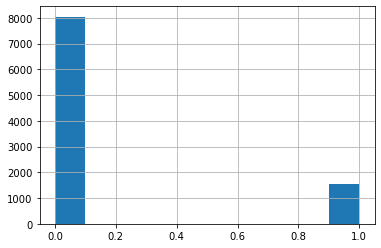

In [6]:
histogram_label = label.hist()

In [7]:
feat

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


### Feature Transformation

In [8]:
# Encoding purpose categorical data
feat_encod = pd.get_dummies(data = feat, columns = ['purpose'], prefix='purpose')
print(feat_encod.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  purpose_all_other  purpose_credit_card  \
0        0                  0                    0   
1 

In [9]:
feat_encod

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,0,1,0,0


In [10]:
type(feat_encod)

pandas.core.frame.DataFrame

In [11]:
feat_encod.shape

(9578, 19)

In [12]:
feat_encod.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
purpose_all_other               uint8
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
purpose_small_business          uint8
dtype: object

In [13]:
feat_encod.var()

credit.policy                 1.570099e-01
int.rate                      7.207607e-04
installment                   4.287852e+04
log.annual.inc                3.779947e-01
dti                           4.738904e+01
fico                          1.441762e+03
days.with.cr.line             6.234661e+06
revol.bal                     1.139480e+09
revol.util                    8.418364e+02
inq.last.6mths                4.841079e+00
delinq.2yrs                   2.983507e-01
pub.rec                       6.871021e-02
purpose_all_other             1.841604e-01
purpose_credit_card           1.144115e-01
purpose_debt_consolidation    2.424797e-01
purpose_educational           3.453239e-02
purpose_home_improvement      6.136501e-02
purpose_major_purchase        4.354826e-02
purpose_small_business        6.045690e-02
dtype: float64

In [14]:
feat_encod.isna().sum()

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

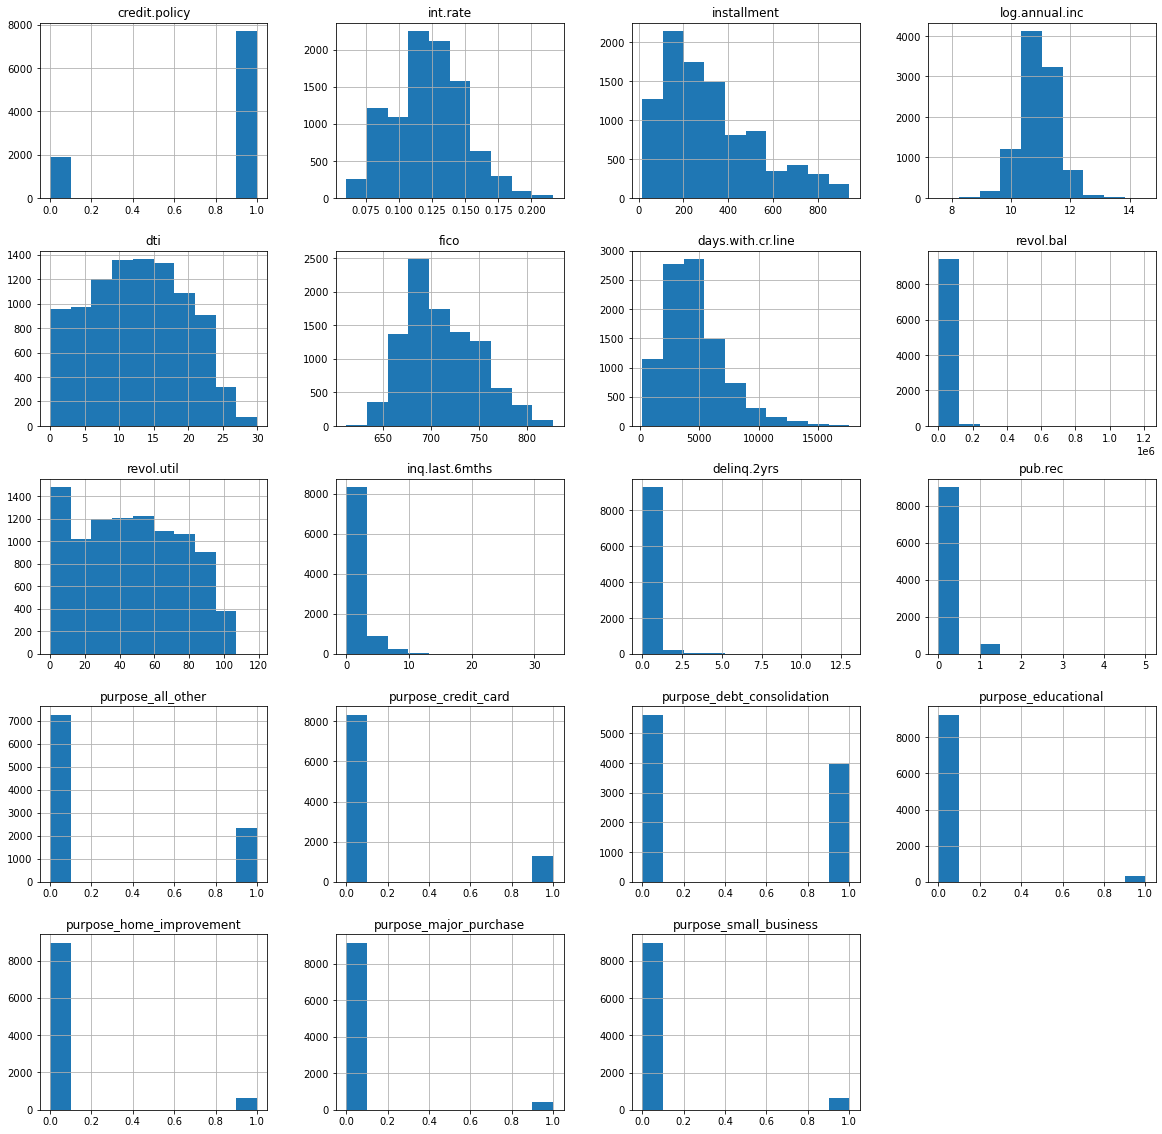

In [15]:
# Features distribution
histograms = feat_encod.hist(feat_encod.columns, figsize=(20, 20))

### Correlation Analysis

<AxesSubplot:>

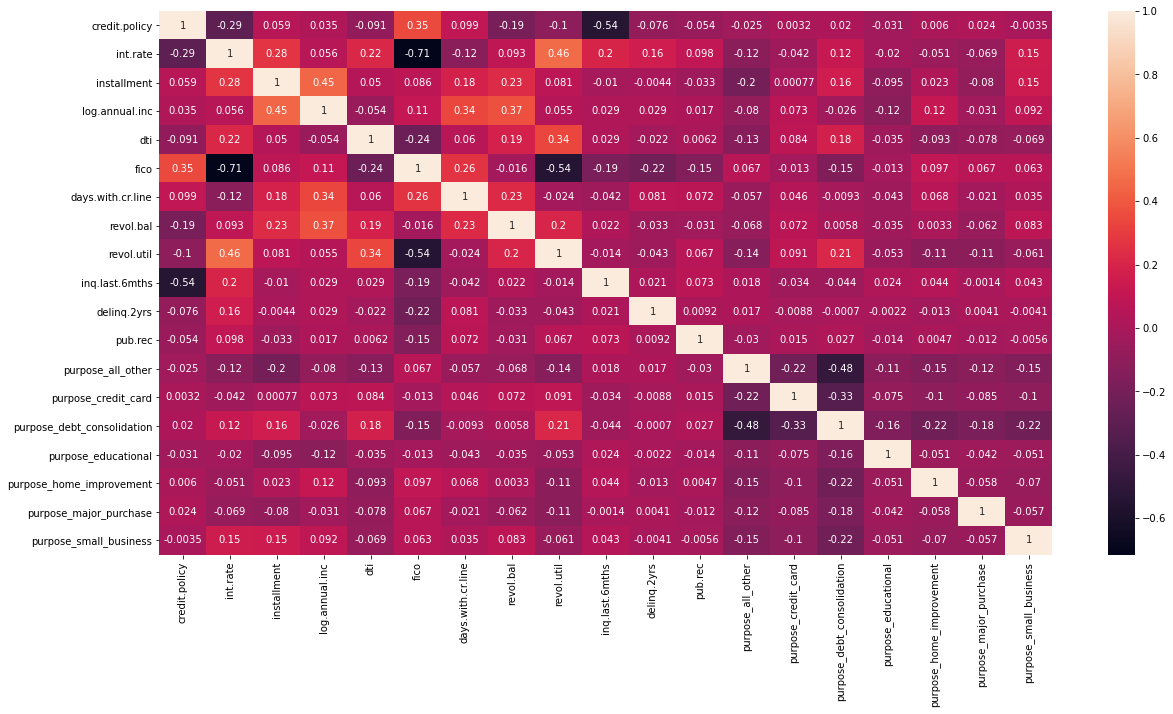

In [16]:
# Determining whether there exist highly correlated features that may be ommited
# The maximum correlation in 0.71 which it is not considered high enough to eliminate one of the features
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20, 10))
corr = feat_encod.corr()
sns.heatmap(corr, annot = True)

In [17]:
feat_encod.corr()['int.rate']['fico']

-0.7148207714193276

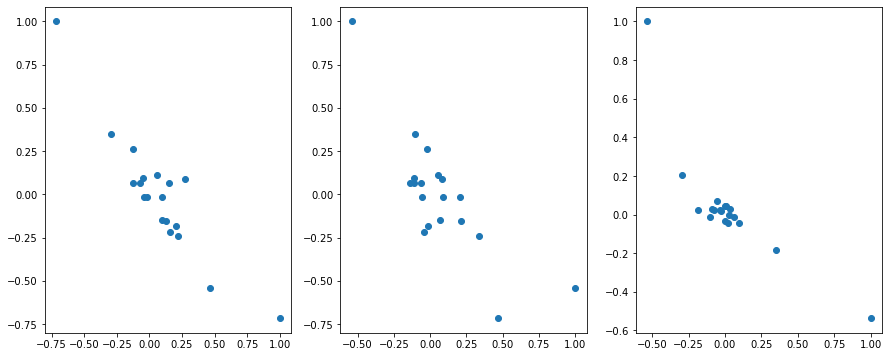

In [18]:
# Scatter plots of the most correlated features
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(feat_encod.corr()['int.rate'],feat_encod.corr()['fico'])
ax2.scatter(feat_encod.corr()['revol.util'],feat_encod.corr()['fico'])
ax3.scatter(feat_encod.corr()['credit.policy'],feat_encod.corr()['inq.last.6mths'])

plt.show()

### Train and Test Data

In [19]:
X = np.array(feat_encod)
y = np.array(label)

In [20]:
X

array([[1.0000e+00, 1.1890e-01, 8.2910e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0710e-01, 2.2822e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.3570e-01, 3.6686e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [0.0000e+00, 1.0710e-01, 9.7810e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.6000e-01, 3.5158e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [0.0000e+00, 1.3920e-01, 8.5343e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print("Number of training samples:", len(X_train))
print("Number of validation samples:", len(X_test))


Number of training samples: 7662
Number of validation samples: 1916


In [22]:
# Counting the classes in the labels of the training dataset
# Setting the weigh of each class for the Dense NN training
counts = np.bincount(y_train[:])
weight_for_0 = 1/ counts[0]
weight_for_1 = 2.25/ counts[1]

class_weight = {0: weight_for_0, 1: weight_for_1}

### Normalizing Data

In [23]:
# Normalizaing Training and Test dataset
mean = np.mean(X_train, axis=0)
X_train -= mean
X_test -= mean
std = np.std(X_train, axis=0)
X_train /= std
X_test /= std

### Building the Dense Network

In [24]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint


metrics = [
    keras.metrics.FalseNegatives(name="fn"),
    keras.metrics.FalsePositives(name="fp"),
    keras.metrics.TrueNegatives(name="tn"),
    keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.BinaryAccuracy(name="binary_accuracy"),
    keras.metrics.AUC(name="auc")
]

model = Sequential()
model.add(Dense(19, input_dim=19, activation='relu', kernel_initializer='normal'))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
optimizer=keras.optimizers.Nadam(lr=0.5e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)

In [25]:
# Class weight was used because of the imbalanced dataset.
# A higher weight was used for the positive default as it represents the most critical class with smaller quantity.
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=12, 
                    batch_size=32, 
                    verbose=1,
                    class_weight=class_weight)

Epoch 1/12
240/240 [==============================] - 2s 7ms/step - loss: 2.8959e-04 - fn: 267.0000 - fp: 5224.0000 - tn: 1234.0000 - tp: 937.0000 - precision: 0.1521 - recall: 0.7782 - binary_accuracy: 0.2833 - auc: 0.5079 - val_loss: 0.7179 - val_fn: 0.0000e+00 - val_fp: 1586.0000 - val_tn: 1.0000 - val_tp: 329.0000 - val_precision: 0.1718 - val_recall: 1.0000 - val_binary_accuracy: 0.1722 - val_auc: 0.5726
Epoch 2/12
240/240 [==============================] - 0s 2ms/step - loss: 2.8296e-04 - fn: 59.0000 - fp: 6058.0000 - tn: 400.0000 - tp: 1145.0000 - precision: 0.1590 - recall: 0.9510 - binary_accuracy: 0.2016 - auc: 0.5685 - val_loss: 0.7402 - val_fn: 0.0000e+00 - val_fp: 1587.0000 - val_tn: 0.0000e+00 - val_tp: 329.0000 - val_precision: 0.1717 - val_recall: 1.0000 - val_binary_accuracy: 0.1717 - val_auc: 0.6054
Epoch 3/12
240/240 [==============================] - 0s 2ms/step - loss: 2.7681e-04 - fn: 20.0000 - fp: 6340.0000 - tn: 118.0000 - tp: 1184.0000 - precision: 0.1574 - rec

In [26]:
history.history.keys()

dict_keys(['loss', 'fn', 'fp', 'tn', 'tp', 'precision', 'recall', 'binary_accuracy', 'auc', 'val_loss', 'val_fn', 'val_fp', 'val_tn', 'val_tp', 'val_precision', 'val_recall', 'val_binary_accuracy', 'val_auc'])

### Metrics Plots

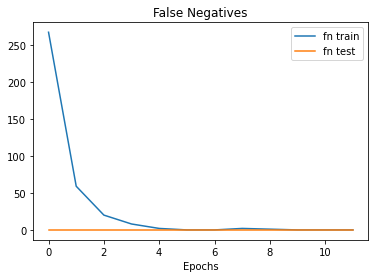

In [27]:
from matplotlib import pyplot

pyplot.plot(history.history['fn'], label='fn train')
pyplot.plot(history.history['val_fn'], label='fn test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.title('False Negatives')
pyplot.show()

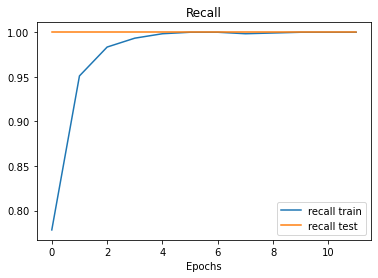

In [28]:
pyplot.plot(history.history['recall'], label='recall train')
pyplot.plot(history.history['val_recall'], label='recall test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.title('Recall')
pyplot.show()

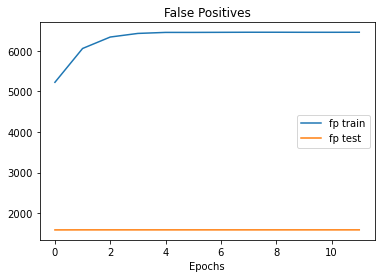

In [29]:
pyplot.plot(history.history['fp'], label='fp train')
pyplot.plot(history.history['val_fp'], label='fp test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.title('False Positives')
pyplot.show()

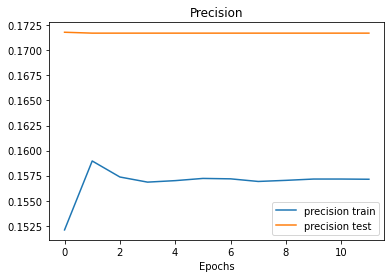

In [30]:
pyplot.plot(history.history['precision'], label='precision train')
pyplot.plot(history.history['val_precision'], label='precision test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.title('Precision')
pyplot.show()

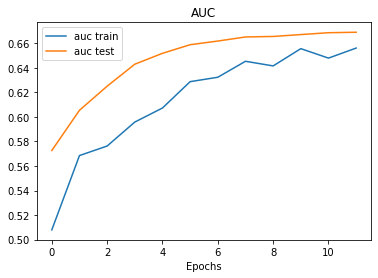

In [31]:
pyplot.plot(history.history['auc'], label='auc train')
pyplot.plot(history.history['val_auc'], label='auc test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.title('AUC')
pyplot.show()

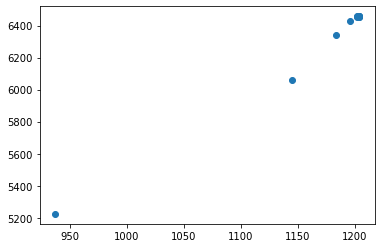

In [32]:
plt.scatter(history.history['tp'], history.history['fp'])
plt.show()

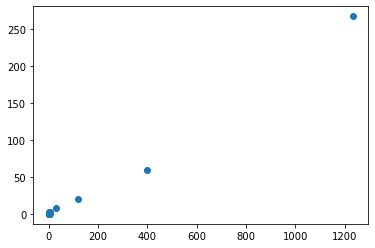

In [33]:
plt.scatter(history.history['tn'], history.history['fn'])
plt.show()

### Model Performance on the Test dataset

In [34]:
score = model.evaluate(X_test, y_test, verbose=2)

60/60 - 0s - loss: 0.9831 - fn: 0.0000e+00 - fp: 1587.0000 - tn: 0.0000e+00 - tp: 329.0000 - precision: 0.1717 - recall: 1.0000 - binary_accuracy: 0.1717 - auc: 0.6691


### Conclusion
##### It's been assumed that the critical role of the system is to identify potential customers who will fail the payments. Therefore, as the number of False Negatives needs to be very low, Recall was used as the main metric to train the model.
##### The Recall index in the Training and Test dataset is 1.0

##### The number of False Positives can increase the required amount of detailed analysis and hence the overall opertaional costs. Therefore, Precision should be used as a secondary metric to evaluate the model performance. However, since the identification of False Negatives were prioritized, the current model did not perform well for Precision.
##### The Precision index in the Training and Test dataset is 0.1572 and 0.1717 respectively.